In [4]:
import pandas as pd
import sqlite3 as sql
conn = sql.connect("factbook.db")
q = 'select * from sqlite_master where type = "table"'   
pd.read_sql_query(q,conn)

type             name         tbl_name  rootpage  \
0  table  sqlite_sequence  sqlite_sequence         3   
1  table            facts            facts        47   

                                                 sql  
0             CREATE TABLE sqlite_sequence(name,seq)  
1  CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY...

In [8]:
q1 = "select * from facts limit 5"
pd.read_sql_query(q1,conn)

id code         name     area  area_land  area_water  population  \
0   1   af  Afghanistan   652230     652230           0    32564342   
1   2   al      Albania    28748      27398        1350     3029278   
2   3   ag      Algeria  2381741    2381741           0    39542166   
3   4   an      Andorra      468        468           0       85580   
4   5   ao       Angola  1246700    1246700           0    19625353   

   population_growth  birth_rate  death_rate  migration_rate  
0               2.32       38.57       13.89            1.51  
1               0.30       12.92        6.58            3.30  
2               1.84       23.67        4.31            0.92  
3               0.12        8.13        6.96            0.00  
4               2.78       38.78       11.49            0.46

## Summary Stastics

In [11]:
q2 = 'select min(population) min_pop, max(population) max_pop, min(population_growth) min_pop_growth, max(population_growth) max_pop_growth from facts'
pd.read_sql_query(q2,conn)

min_pop     max_pop  min_pop_growth  max_pop_growth
0        0  7256490011             0.0            4.02

#### Here we can see there is a country with zero population and zero population growth, Also there is a country having population 7 billions.

In [15]:
q3 = 'select name, min(population) from facts'
pd.read_sql_query(q3,conn)

name  min(population)
0  Antarctica                0

#### Here its ovious that antartica is having zero registered population because of the environment conditions.

In [16]:
q4 = 'select name, max(population) from facts'
pd.read_sql_query(q4,conn)

name  max(population)
0  World       7256490011

#### so here we can see this the not the population of any country. this is the total population of the world

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c9ad6c668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8c9ac007b8>]], dtype=object)

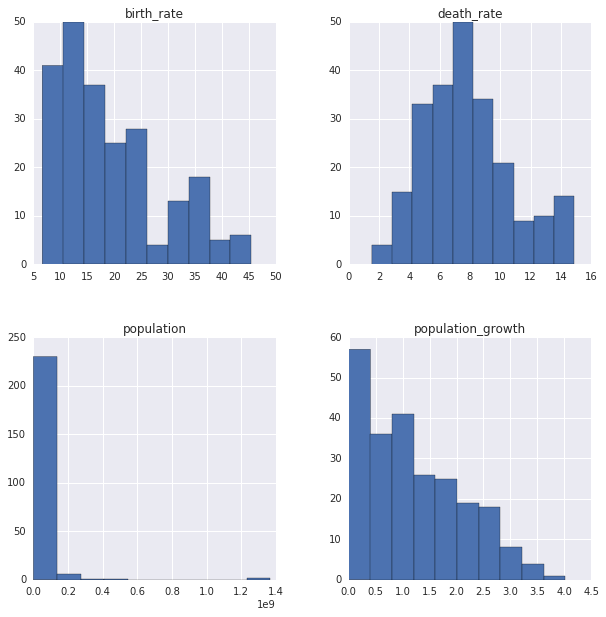

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
q5 = 'select population, population_growth, birth_rate, death_rate from facts where name not in ("Antarctica","World")'


pd.read_sql_query(q5,conn).hist(ax=ax)

### Highest population density


In [27]:
q6 = 'select name, max(population / area_land) pop_density from facts'
pd.read_sql_query(q6,conn)

name  pop_density
0  Macau        21168

### Here we can see the highest population density is in Macau(China)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c9ab55d68>]], dtype=object)

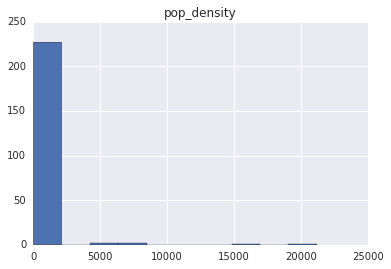

In [30]:
q7 = 'select population / area_land pop_density from facts'
pd.read_sql_query(q7,conn).hist()

### We can observe that there are around 220-30 countries having population density between 0-2300 and also soe countries are having population density around 18k to 22 k.

In [33]:
q7 = 'select name, max(area_water / area_land) water_to_land_ration from facts'
pd.read_sql_query(q7,conn)

name  water_to_land_ration
0  British Indian Ocean Territory                   905

#### As we can see the Indian ocean terrioty that is between Tanjania and Indonesia is having the highes